# Multilayer Perception implemented in numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data import get_names

In [2]:
words = get_names()
print(words[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']


- bigram character language model
- receives a single character as input; output is the probability distribution of the next character in the sequence
- using gradient descent 

In [3]:
characters = ['.', *sorted({c for w in words for c in w})]
print(characters)
print(len(characters))
index = {
    c:i
    for i, c in enumerate(characters)
}
index
print(index)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
27
{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [4]:
# create the training set of all of the bigrams
# x is the input, y is the target (i.e. the next character)
x, y = [], []
training_data = []
for w in words:
    chars = ['.',  *w, '.']
    for c1, c2 in zip(chars, chars[1:]):
        x.append(index[c1])
        y.append(index[c2])

x = np.array(x)
y = np.array(y)

print(x[:10])
print(y[:10])

[ 0  5 13 13  1  0 15 12  9 22]
[ 5 13 13  1  0 15 12  9 22  9]


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


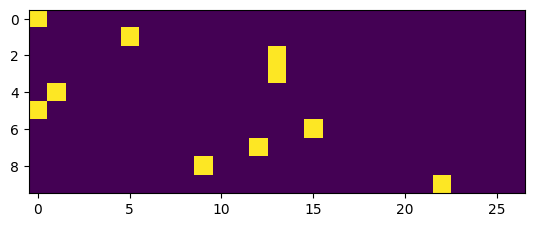

In [5]:
# encode
def one_hot_encode(index: int) -> np.array:
    """Return a one-hot encoded vector of the given index."""
    vector = np.zeros(len(characters))
    vector[index] = 1
    return vector

x_encoded = np.array([one_hot_encode(i) for i in x])
y_encoded = np.array([one_hot_encode(i) for i in y])

print(x_encoded[:6])
plt.imshow(x_encoded[0:10])

In [20]:
seed = 42
rng = np.random.default_rng(seed)

input_size = len(characters)
hidden_size = 50
output_size = len(characters)

# weights between input and hidden layer
W_1 = rng.normal(size=(hidden_size, input_size)) * 0.01
# biases of the hidden layer
b_1 = np.zeros((hidden_size, 1))
W_2 = rng.normal(size=(output_size, hidden_size)) * 0.01
b_2 = np.zeros((output_size, 1))

print(W_1.shape)
print(b_1.shape)
print(W_2.shape)
print(b_2.shape)

(50, 27)
(50, 1)
(27, 50)
(27, 1)


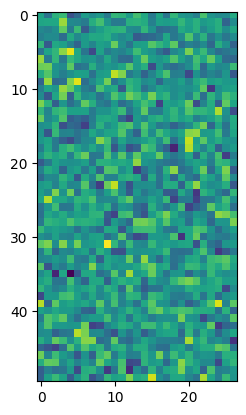

In [7]:
plt.imshow(W_1)

---

# Forward Pass

## Relationship between "fully connected" layers and matrix multiplication 

In [8]:
x_batch = x_encoded[:32]
x_batch.shape
print(f"We have a batch of {x_batch.shape[0]} examples, each with {x_batch.shape[1]} features (one hot encoding of characters).")  # noqa

We have a batch of 32 examples, each with 27 features (one hot encoding of characters).


We need to calculate the "pre-activation values" which is a value that connects each neuron to an example in the batch.

The `pre-activations` are a matrix of values corresponding to the neurons in the hidden layer (`50`) and the batch size (`32`).

The pre-activations are calculated by matrix-multiplying the weights of the input/hidden layer by the batch examples/features and adding the bias.

In [9]:
pre_activations = ((W_1 @ x_batch.T) + b_1)
pre_activations.shape

(50, 32)

In [10]:
print(f"dot(W, x.T) = dot((neurons, input), (input, batch)) = dot({W_1.shape}, {x_batch.T.shape})")

dot(W, x.T) = dot((neurons, input), (input, batch)) = dot((50, 27), (27, 32))


In [11]:
pre_activations_hidden = np.dot(W_1, x_batch.T)
assert (pre_activations == pre_activations_hidden).all()  # biases are all zeros at this point
print(f"dot(W, x.T) = dot((neurons, input), (input, batch)) = dot({W_1.shape}, {x_batch.T.shape}) = ({pre_activations_hidden.shape})")  # noqa
assert (pre_activations_hidden == W_1 @ x_batch.T).all()
# np.dot(W1, X)

dot(W, x.T) = dot((neurons, input), (input, batch)) = dot((50, 27), (27, 32)) = ((50, 32))


Matrix multiplication is calculated by taking the first row of the first matrix and the first column of the second matrix and doing a dot product (multiplying all corresponding elements together and then summing across all results), and repeating for all row/column combinations of the first and second matrix respectively.

However, in order to do the matrix multiplication with our weight matrix and batch matrix, we have to transpose the batch matrix.

We start with these dimensions `(neurons x input_size) @ (batch_size x input_size)`

But we need `(neurons x input_size) @ (input_size x batch_size)`

And so we take the first row of the weight matrix and the first column of the transposed batch matrix and do a dot product. But the `first column of the transposed batch matrix` is the same as the first row of the non-transposed batch matrix. So really, each value in the pre-activation matrix is the dot product of the connections of a particular neuron (e.g. the first row in weights matrix is the first neuron) to the inputs of a particular example (e.g. first row in batch matrix) resulting an a matrix that has 50 rows corresponding to the the number of neurons and 32 columns corresponding to each of the examples.

In [12]:
# first row of weights, and first column of transposed input
w_row = W_1[0, :]
xt_column = x_batch.T[:, 0]
w_row.shape, xt_column.shape
# dot product is just the sum of the element-wise product
assert np.dot(w_row, xt_column) == (w_row * xt_column).sum()

In [13]:
# but the first column of transposed input is just the first row of the input (non-transposed)
for r in range(len(x_batch)):
    assert (x_batch.T[:, r] == x_batch[r, :]).all()

assert np.dot(w_row, xt_column) == np.dot(w_row, x_batch[0, :])
# and so below, we don't need to transpose the input and we can just use the dot product
# for each row (i.e. nueron) of the weights and each row (example) of the input

In [14]:
# manual dot product i.e. matrix multiplication
# matrix multiplication is the dot product of the rows of the first matrix with the columns of the
# second matrix
assert W_1.shape[1] == x_batch.T.shape[0]
# the result will have the same number of rows as the first matrix and the same number of columns
pre_activations_manual = np.zeros((W_1.shape[0], x_batch.shape[0]))
for i in range(W_1.shape[0]):
    for j in range(x_batch.shape[0]):
        pre_activations_manual[i, j] = np.dot(W_1[i], x_batch[j])

print(pre_activations_manual.shape)
assert (pre_activations_manual == pre_activations_hidden).all()

(50, 32)


In [15]:
# and so the first element in the pre-activations is the dot product of the first row (neuron) of the
# weights and the first row (example) of the input (we haven't included the bias yet)
# in other words, the first neuron is connected to each of the inputs (27) with a weight, which is
# why our weights matrix has 27 columns. Each column is a weight for each input. The matrix
# connects all of the inputs to all of the neurons. The dot product of the first row of the weights
# and the first row of the input is the sum of the element-wise product of the two vectors. This
# is the pre-activation of the first neuron for the first example. There are 50 neurons and 32 examples
# so the pre-activations matrix is 50 x 32
assert pre_activations_hidden[0,0] == np.dot(W_1[0, :], x_batch[0, :])

---

## Actual Pass

In [16]:
def relu(x: np.array) -> np.array:
    return np.maximum(0, x)

def relu_derivative(x: np.array) -> np.array:
    return (x > 0).astype(float)

In [21]:
# activations for first layer
Z_1 = (W_1 @ x_batch.T) + b_1  # pre-activations for layer 1
A_1 = relu(Z_1)  # activations for layer 1
print(f"({W_1.shape} @ {x_batch.T.shape}) + {b_1.shape} = ({A_1.shape})")
Z_2 = (W_2 @ A_1) + b_2  # pre-activations for layer 2
A_2 = relu(Z_2)  # activations for layer 2
# our output size is 27 which happens to be the same as the input size (but in general doesn't
# have to be the same)
# so the result is 27 outputs for each of the 32 examples
print(f"({W_2.shape} @ {A_1.shape}) + {b_2.shape} = ({A_2.shape})")

((50, 27) @ (27, 32)) + (50, 1) = ((50, 32))
((27, 50) @ (50, 32)) + (27, 1) = ((27, 32))
